## Consumer Behavior & Engagement Analysis

This project analyzes consumer shopping behavior using Python, with a focus on behavioral patterns, engagement trends, and purchasing decisions.

The analysis includes data cleaning, exploratory data analysis (EDA), visualization, and regression modeling to understand factors influencing purchase amount and consumer behavior.


In [24]:
import os
os.getcwd()

'/Users/sarahcruz/Desktop/Consumer-Behavior-Project'

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("shopping_behavior_updated.csv")

print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()


Dataset shape: 3900 rows × 18 columns


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [26]:
# CHECKING FOR MISSING VALUES

print("Missing Values:")
missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
   print("\n No missing values found.")
else:
   print("\n MISSING VALUES, CLEANING REQUIRED.")

Missing Values:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

 No missing values found.


In [27]:
#CHECKING FOR DUPLICATES

duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [28]:
#CHECKING FOR DATA TYPE
print("Data Types:")
print(df.dtypes)

Data Types:
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [29]:
# CONVERTING CATEGORICAL FEATURES

categorical_cols = [
    "Gender", "Item Purchased", "Category", "Location", "Size", "Color",
    "Season", "Subscription Status", "Shipping Type", "Discount Applied",
    "Promo Code Used", "Payment Method", "Frequency of Purchases"]

for col in categorical_cols:
    df[col] = df[col].astype("category")
    
print(df.dtypes)

Customer ID                  int64
Age                          int64
Gender                    category
Item Purchased            category
Category                  category
Purchase Amount (USD)        int64
Location                  category
Size                      category
Color                     category
Season                    category
Review Rating              float64
Subscription Status       category
Shipping Type             category
Discount Applied          category
Promo Code Used           category
Previous Purchases           int64
Payment Method            category
Frequency of Purchases    category
dtype: object


In [30]:
# CREATING AGE GROUPS

df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[18, 30, 40, 50, 60, 70],
    labels=["18–30", "31–40", "41–50", "51–60", "61–70"])

df[["Age", "Age_Group"]].head()

,Age,Age_Group
0,55,51–60
1,19,18–30
2,50,41–50
3,21,18–30
4,45,41–50


In [31]:
#EDA

/var/folders/yn/vxx0lq0x7y73g8dzf14c169c0000gn/T/ipykernel_12708/2258202884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


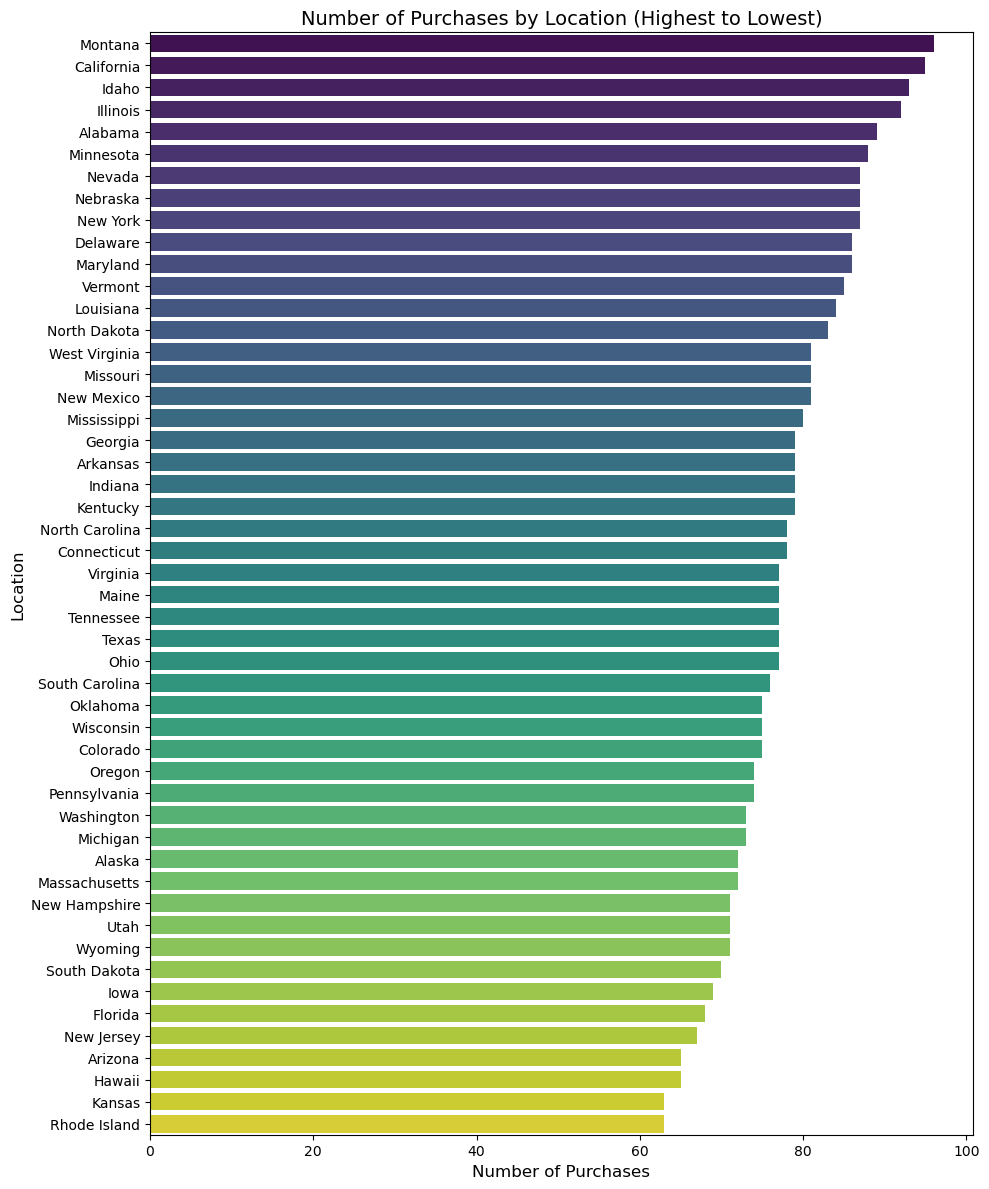

In [32]:
# NUMBER OF PURCHASES BY LOCATION GRAPH
location_counts = df["Location"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(
    x=location_counts.values,
    y=location_counts.index,        
    order=location_counts.index,    
    palette="viridis")

plt.title("Number of Purchases by Location (Highest to Lowest)", fontsize=14)
plt.xlabel("Number of Purchases", fontsize=12)
plt.ylabel("Location", fontsize=12)

plt.tight_layout()
plt.show()

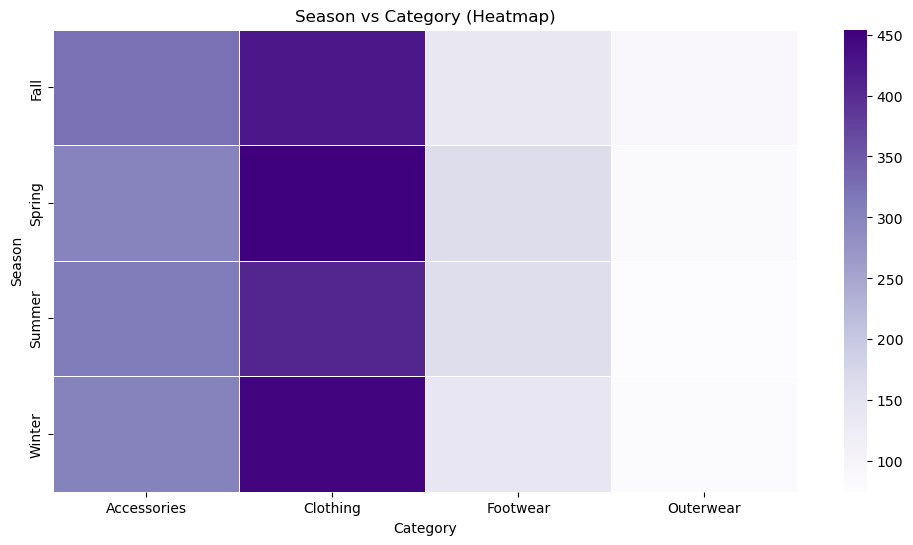

In [33]:
# SEASON VS CATEGORY GRAPH

cross = pd.crosstab(df["Season"], df["Category"])

plt.figure(figsize=(12,6))
sns.heatmap(cross, cmap="Purples", linewidths=.5)
plt.title("Season vs Category (Heatmap)")
plt.xlabel("Category")
plt.ylabel("Season")
plt.show()

/var/folders/yn/vxx0lq0x7y73g8dzf14c169c0000gn/T/ipykernel_12708/2035249776.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase_avg = df.groupby("Age_Group")["Purchase Amount (USD)"].mean()


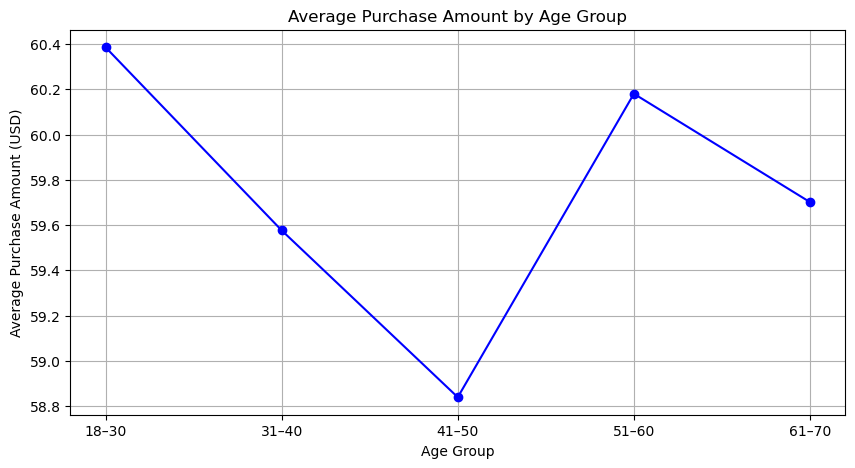

In [34]:
# AVERAGE PURCHASE AMOUNT BY AGE GROUP GRAPH

age_purchase_avg = df.groupby("Age_Group")["Purchase Amount (USD)"].mean()

plt.figure(figsize=(10,5))
plt.plot(age_purchase_avg.index, age_purchase_avg.values, marker='o', linestyle='-', color='blue')
plt.title("Average Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount (USD)")
plt.grid(True)
plt.show()

/var/folders/yn/vxx0lq0x7y73g8dzf14c169c0000gn/T/ipykernel_12708/1643705035.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df.groupby("Season")["Purchase Amount (USD)"].mean().reindex(order)


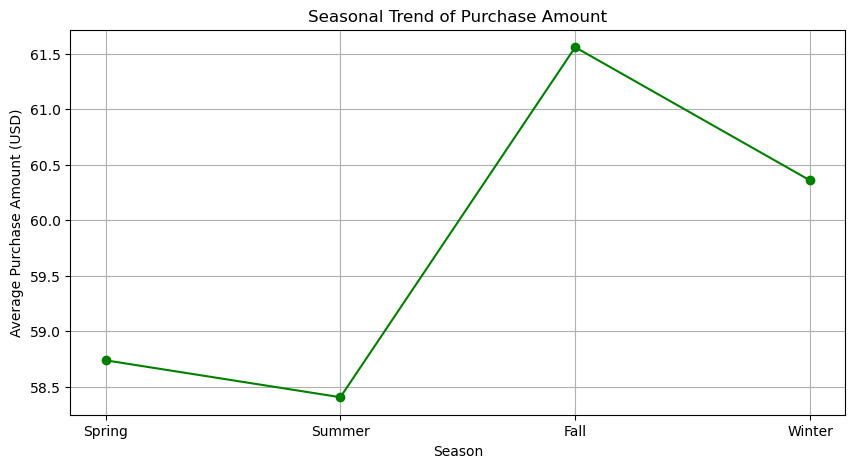

In [35]:
# SEASONAL TREND AND PURCHASE AMOUNT GRAPH

order = ["Spring", "Summer", "Fall", "Winter"]

season_avg = df.groupby("Season")["Purchase Amount (USD)"].mean().reindex(order)

plt.figure(figsize=(10,5))
plt.plot(season_avg.index, season_avg.values, marker='o', linestyle='-', color='green')
plt.title("Seasonal Trend of Purchase Amount")
plt.xlabel("Season")
plt.ylabel("Average Purchase Amount (USD)")
plt.grid(True)
plt.show()

In [36]:
#FEATURE SELECTION + ONE-HOT ENCODING

selected_features = [
    "Previous Purchases",
    "Review Rating",
    "Category",
    "Season",
    "Discount Applied",
    "Subscription Status",
    "Frequency of Purchases"
]

df_model = df[selected_features]

df_model_encoded = pd.get_dummies(df_model, drop_first=True)

X = df_model_encoded
y = df["Purchase Amount (USD)"]

In [37]:
#TRAIN / TEST SPLIT

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [38]:
# SIMPLE LINEAR REGRESSION (BASELINE)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm_simple = LinearRegression()
lm_simple.fit(x_train[["Previous Purchases"]], y_train)

y_pred_simple = lm_simple.predict(x_test[["Previous Purchases"]])

print("Simple Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("R²:", r2_score(y_test, y_pred_simple))

Simple Linear Regression
MSE: 563.162672416802
R²: -0.006398165493395336


In [39]:
# MULTIPLE LINEAR REGRESSION

lm_multi = LinearRegression()
lm_multi.fit(x_train, y_train)

y_pred_multi = lm_multi.predict(x_test)

print("\nMultiple Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R²:", r2_score(y_test, y_pred_multi))


Multiple Linear Regression
MSE: 563.078055975276
R²: -0.0062469519352295055


In [40]:
# POLYNOMIAL REGRESSION (DEGREE 2)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)
y_pred_poly = poly_model.predict(x_poly_test)

print("\nPolynomial Regression (Degree 2)")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R²:", r2_score(y_test, y_pred_poly))


Polynomial Regression (Degree 2)
MSE: 589.2654093747576
R²: -0.0530449833233253


In [41]:
# RIDGE, LASSO, ELASTIC NET

from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

# Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.2)
elastic.fit(x_train, y_train)
y_pred_elastic = elastic.predict(x_test)

In [42]:
# MODEL PERFORMANCE SUMMARY

results = pd.DataFrame({
    "Model": [
        "Simple Linear Regression",
        "Multiple Linear Regression",
        "Polynomial (Degree 2)",
        "Ridge Regression",
        "Lasso Regression",
        "Elastic Net Regression"
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_simple),
        mean_squared_error(y_test, y_pred_multi),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_elastic)
    ],
    "R²": [
        r2_score(y_test, y_pred_simple),
        r2_score(y_test, y_pred_multi),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_elastic)
    ]
})

results

,Model,MSE,R²
0,Simple Linear Regression,563.162672,-0.006398
1,Multiple Linear Regression,563.078056,-0.006247
2,Polynomial (Degree 2),589.265409,-0.053045
3,Ridge Regression,563.055468,-0.006207
4,Lasso Regression,562.753448,-0.005667
5,Elastic Net Regression,562.217252,-0.004709


## Key Takeaways

- Consumer purchasing behavior varies across demographics and product categories  
- Certain features show stronger relationships with purchase amount than others  
- Exploratory analysis and modeling support data-driven insights into consumer behavior